R Code pulled from https://www.statmethods.net/advgraphs/ggplot2.html

In [10]:
# ggplot2 examples
library(ggplot2) 

In [11]:
require( readxl )
require( survival )
require( rms )

In [12]:
# Survival data is in the "labs" spreadsheet
xls <- "data/labs.xlsx"

h <- read_xlsx( xls, sheet="General" )

# Add a column to distinguish between a "living" entry and a "dead" entry, as required by the survival package.
# dead==2
# censored=1 -- a censored animal was alive at the time the data was recorded.
h$status = 2  # dead
h$status[ h$sval==24 ] = 1  # censored

# Convert to a simple dataframe
hh = data.frame( group=h$group, animal_id=h$animal_id, time=h$sval, status=h$status )


In [13]:
# Compute survival info
hh$SurvObj <- with( hh, Surv(time, status==2) )
sm.by.grp <- npsurv(SurvObj ~ group, data = hh, conf.type = "none")

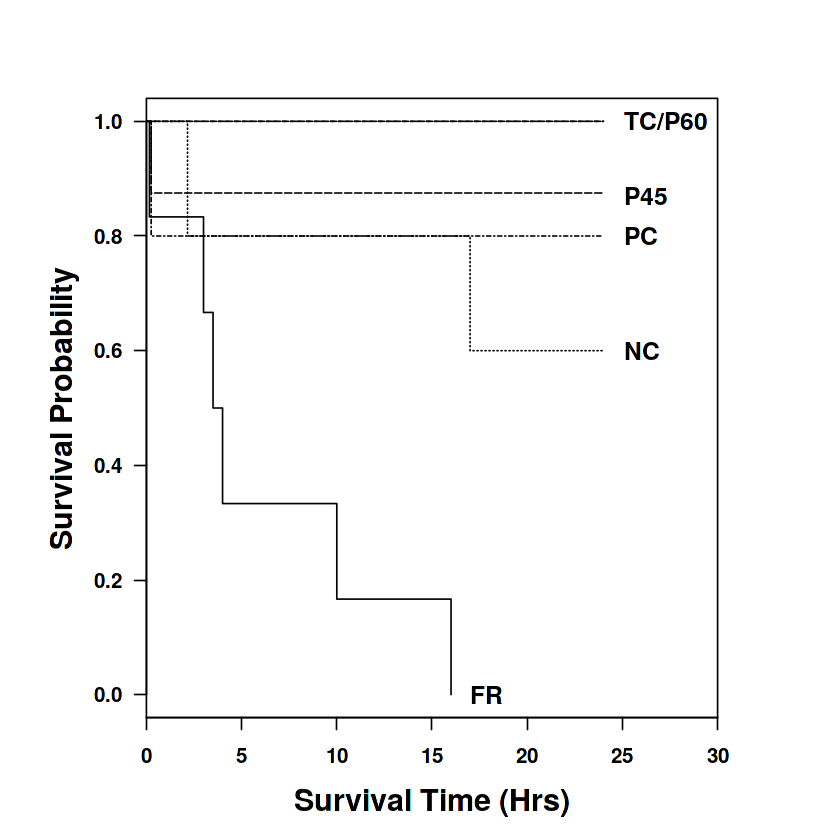

In [14]:
# Plot the survival by study group
par(mar = c(5, 6, 4, 5) + 0.1)
par( font=2 )   # Use bold font

par( adj=0.5 )  # center text on the axis labels
par( cex=1 )    # Set text magnification factor to 1 for the axis tick text
plot( sm.by.grp, main="", 
    xlab="Survival Time (Hrs)", ylab="Survival Probability",
    xlim=c(0,30), lty=c(1,3,5,6,4,2), font=2, las = 1, font.lab=2, cex.lab=1.5
    )

# ...and label the associated lines
par( adj=0 )    # Change to left justify
par( cex=1.2 )  # Increase text magnification

text( 25.1, 0.87, "P45")  # put labels on the graphs
text( 25.1, 0.8, "PC" )
text( 25.1, 0.6, "NC" )
text( 25.1, 1.0, "TC/P60" )
text( 17, 0.0, "FR" )


In [2]:
# create factors with value labels 
mtcars$gear <- factor(mtcars$gear,levels=c(3,4,5),
  	labels=c("3gears","4gears","5gears")) 
mtcars$am <- factor(mtcars$am,levels=c(0,1),
  	labels=c("Automatic","Manual")) 
mtcars$cyl <- factor(mtcars$cyl,levels=c(4,6,8),
   labels=c("4cyl","6cyl","8cyl")) 

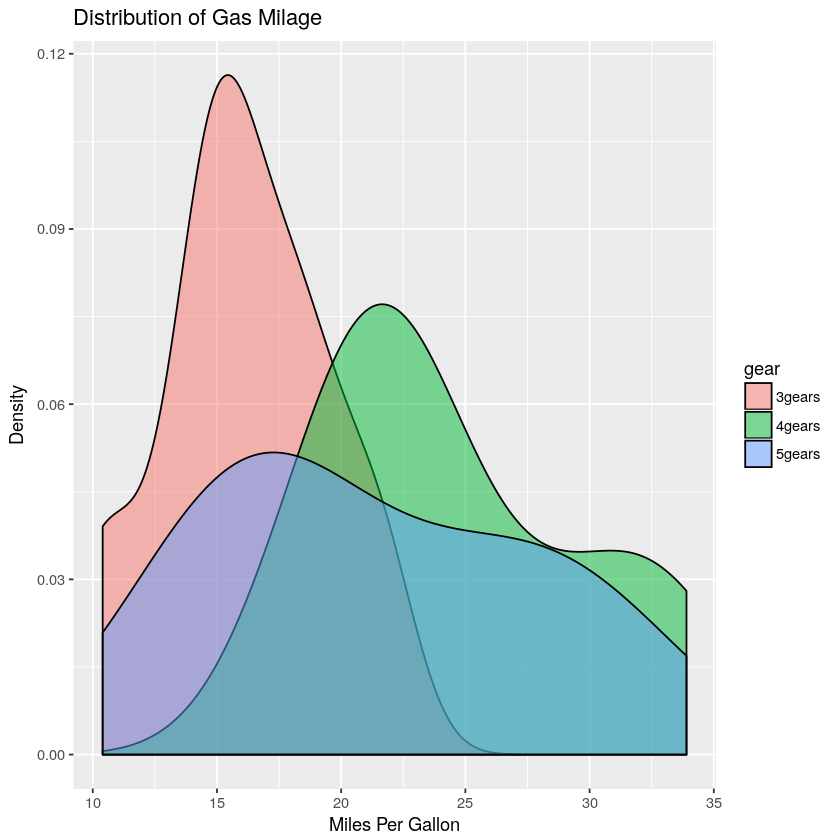

In [3]:
# Kernel density plots for mpg
# grouped by number of gears (indicated by color)
qplot(mpg, data=mtcars, geom="density", fill=gear, alpha=I(.5), 
   main="Distribution of Gas Milage", xlab="Miles Per Gallon", 
   ylab="Density")

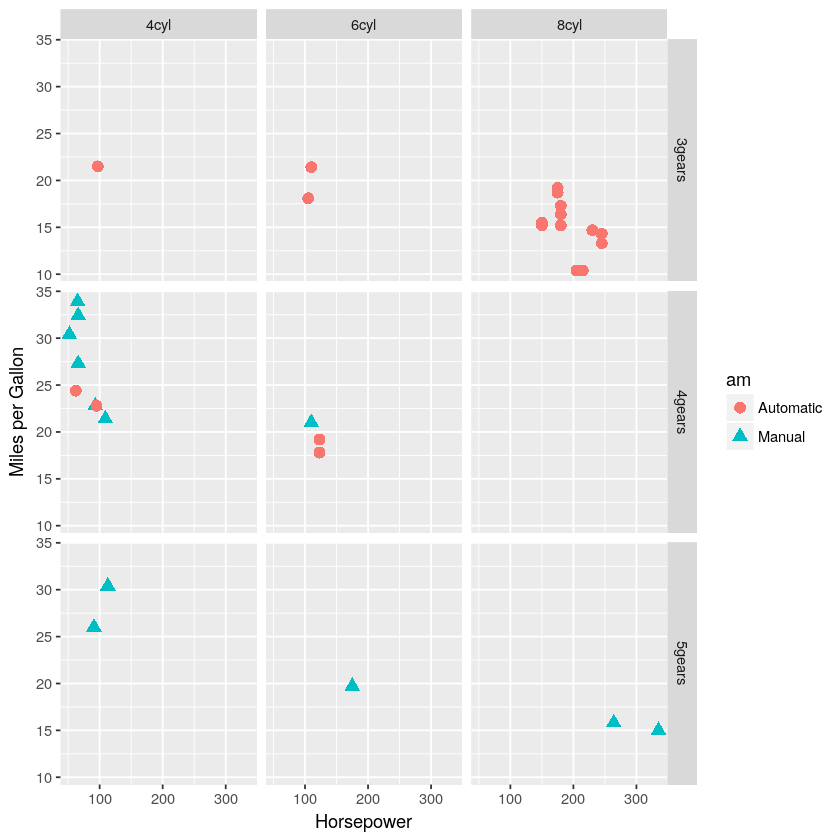

In [4]:
# Scatterplot of mpg vs. hp for each combination of gears and cylinders
# in each facet, transmittion type is represented by shape and color
qplot(hp, mpg, data=mtcars, shape=am, color=am, 
   facets=gear~cyl, size=I(3),
   xlab="Horsepower", ylab="Miles per Gallon") 

Warning message:
“Ignoring unknown parameters: method, formula”

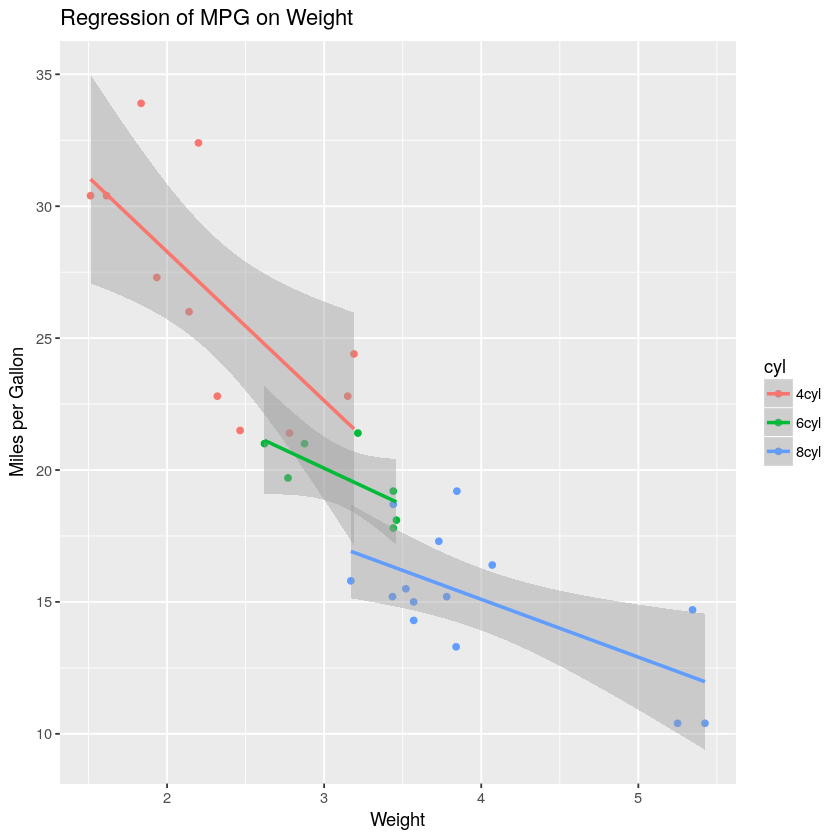

In [5]:
# Separate regressions of mpg on weight for each number of cylinders
qplot(wt, mpg, data=mtcars, geom=c("point", "smooth"), 
   method="lm", formula=y~x, color=cyl, 
   main="Regression of MPG on Weight", 
   xlab="Weight", ylab="Miles per Gallon")

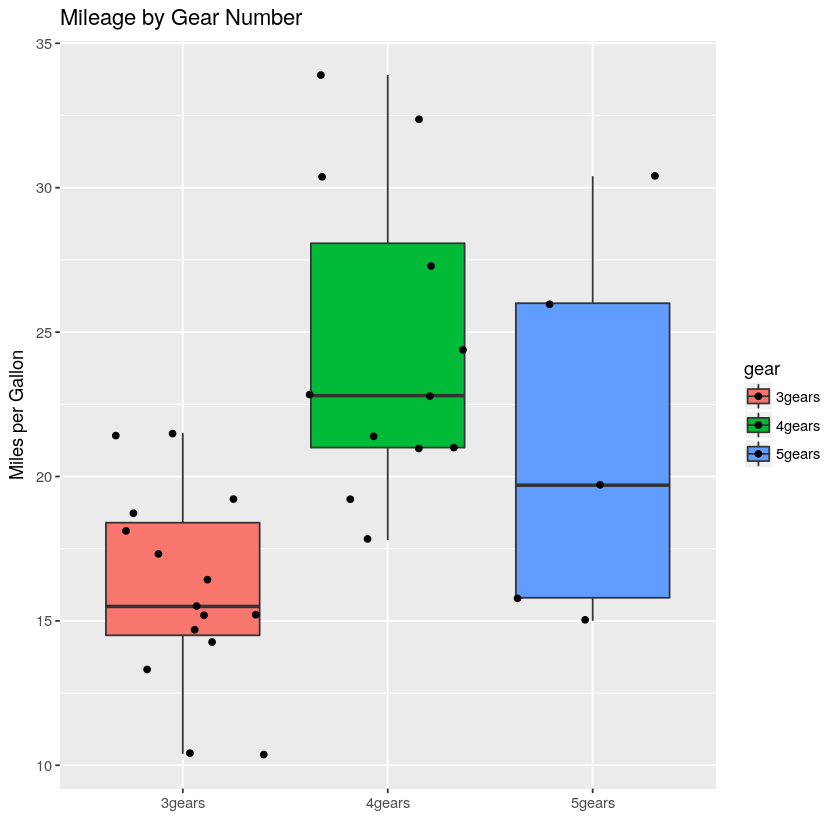

In [6]:
# Boxplots of mpg by number of gears 
# observations (points) are overlayed and jittered
qplot(gear, mpg, data=mtcars, geom=c("boxplot", "jitter"), 
   fill=gear, main="Mileage by Gear Number",
   xlab="", ylab="Miles per Gallon")